## 1. Data Upload

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.optimize import minimize

In [2]:
# path_csv = '.'

# Get the path of the current .ipynb file
script_dir = os.getcwd()

# Path to the project folder (parent of script_folder)
project_dir = os.path.dirname(script_dir)

# Path to the target subfolder
mnist_subfolder_path = os.path.join(project_dir, 'mnist')

# Construct the full path to the CSV file
csv_file_path = os.path.join(mnist_subfolder_path, 'mnist_matrix_B_test.csv')

print("Target CSV File Path:", csv_file_path)

# Read the CSV file into a pandas dataframe
input_formal_model = pd.read_csv(csv_file_path)

Target CSV File Path: C:\Courses\transition-matrix-ml\mnist\mnist_matrix_B_test.csv


In [3]:
# Rename some columns in order to fit the pattern
input_formal_model_rename = input_formal_model.rename(columns={'unique_id': 'ID', 'label': 'Target'})

# Sort the table by the Target
input_formal_model_sorted = input_formal_model_rename.sort_values(by='Target', ascending=True)

In [4]:
# Save the temp data
input_formal_model_sorted.to_csv('.\projects_temp-data\input_formal_model_sorted.csv', index=False)

In [22]:
# Extract the necessary subtables
formal_model_sorted_features = input_formal_model_sorted.drop('Target', axis=1).drop('ID', axis=1)
formal_model_sorted_with_id = input_formal_model_sorted.drop('Target', axis=1)
formal_model_sorted_id = input_formal_model_sorted['ID']
formal_model_sorted_target = input_formal_model_sorted['Target']

## 2. Multi-dimensional scaling

In [23]:
# Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(formal_model_sorted_features)

# # Apply MDS to reduce the dimensions to 2
# mds = MDS(n_components=2, normalized_stress='auto')
# X_mds = mds.fit_transform(formal_model_sorted_features)

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42, n_iter=500)
X_tsne = tsne.fit_transform(formal_model_sorted_features)


In [24]:
# Normalize the t-SNE output to be between -5 and 5
# min_max_scaler = MinMaxScaler(feature_range=(-10, 10))
# X_mds_normalized = min_max_scaler.fit_transform(X_tsne)

# Convert the reduced data back to a pandas DataFrame
formal_model_sorted_reduced = pd.DataFrame(X_tsne, columns=["x1", "x2"])

In [25]:
formal_model_sorted_reduced.to_csv('.\projects_temp-data\\formal_model_sorted_reduced.csv', index=False)

formal_model_sorted_reduced

,x1,x2
0,38.569771,3.078991
1,34.579330,2.852124
2,33.691673,8.304570
3,32.410656,2.051841
4,35.178402,-0.799330
...,...,...
995,-35.368832,-12.050308
996,-35.229717,-10.387899
997,-12.485795,-14.191841
998,-30.619495,-6.208299


## 3. Visual analytics

In [26]:
def interpolate_coordinates(x_1, x_n, n):
    """
    This function calculates the values of the interpolate_coordinates
    of a line based on its first and last coordinates.
    :param x_1:
    :param x_n:
    :param n:
    :return:
    """
    # Ensure n is greater than 1 to avoid division by zero
    if n <= 1:
        raise ValueError("n must be greater than 1 to calculate intermediate points.")

    # List to hold all the coordinates including the first and the last
    inter_coordinates = []

    # Calculate each intermediate coordinate
    for iter in range(0, n):
        x_iter = x_1 + ((x_n - x_1) * iter) / (n - 1)
        inter_coordinates.append(x_iter)

    return inter_coordinates


In [27]:
def sample_random_rows(df1, df2, column, n_samples):
    """
    This function is for visualization.
    Sample n_samples random rows for each unique value in the specified column of df1.
    Simultaneously sample corresponding rows in df2.

    :param df1: pandas DataFrame (main DataFrame to sample by 'Target')
    :param df2: pandas DataFrame (secondary DataFrame to sample corresponding rows)
    :param column: Column name in df1 to group by (e.g., 'Target')
    :param n_samples: Number of random samples to select from each group
    :return: Tuple of DataFrames with the sampled rows from df1 and df2
    """
    # Ensure that both DataFrames have the same index
    df1 = df1.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)

    # Sample from df1 and get the indices
    sampled_indices = (df1.groupby(column).apply(lambda x: x.sample(n=n_samples, replace=True if len(x) < n_samples else False).index)
                       .explode()
                       .tolist())

    # Sample from df2 using the same indices
    sampled_df1 = df1.loc[sampled_indices].reset_index(drop=True)
    sampled_df2 = df2.loc[sampled_indices].reset_index(drop=True)

    return sampled_df1, sampled_df2

NUM_SAMPLES = 100

sampled_input_formal_model_sorted, sampled_formal_model_sorted_reduced = sample_random_rows(
    input_formal_model_sorted, formal_model_sorted_reduced, 'Target', NUM_SAMPLES)


In [28]:
# sampled_input_formal_model_sorted.to_csv('.\projects_temp-data\sampled_input_formal_model_sorted.csv', index=False)
# sampled_formal_model_sorted_reduced.to_csv('.\projects_temp-data\sampled_formal_model_sorted_reduced.csv', index=False)

In [29]:
x_1_first = 3
x_1_last = -1.5
x_2_first = 0
x_2_last = -1

# The number of intermediate points
num_inter_points = formal_model_sorted_features.shape[1]

x_1_inter_coordinates = interpolate_coordinates(x_1_first, x_1_last, num_inter_points)
x_2_inter_coordinates = interpolate_coordinates(x_2_first, x_2_last, num_inter_points)
# print(x_1_inter_coordinates)
# print(x_2_inter_coordinates)

# Create a DataFrame from the coordinates
coordinates_df = pd.DataFrame({'x1': x_1_inter_coordinates, 'x2': x_2_inter_coordinates})
coordinates_df

,x1,x2
0,3.000000,0.000000
1,2.994253,-0.001277
2,2.988506,-0.002554
3,2.982759,-0.003831
4,2.977011,-0.005109
...,...,...
779,-1.477011,-0.994891
780,-1.482759,-0.996169
781,-1.488506,-0.997446
782,-1.494253,-0.998723


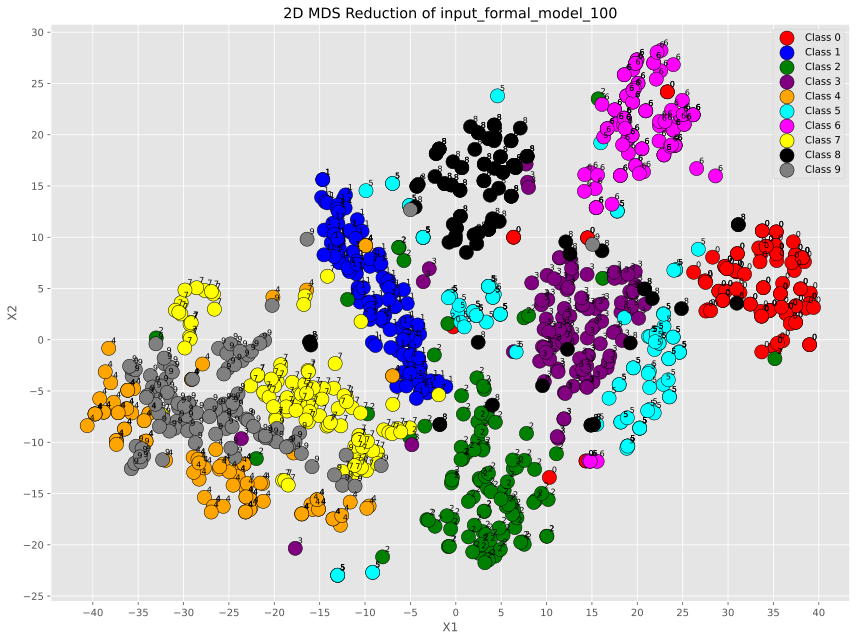

<Figure size 1920x1440 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%config InlineBackend.figure_format = 'svg' 
plt.style.use('ggplot')

visual_input_formal_model = sampled_input_formal_model_sorted
visual_formal_model_reduced = sampled_formal_model_sorted_reduced

# Set up hyperparams
NUM_CLASSES = 9

# Create a colormap
# colormap = plt.cm.get_cmap('Paired', NUM_CLASSES)

# Define ten colors
my_colors = ['red', 'blue', 'green', 'purple', 'orange', 
             'cyan', 'magenta', 'yellow', 'black', 'gray']

plt.figure(figsize=(12, 9))

# Set tick frequency using MultipleLocator
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Iterate over each class and plot each class with a color from the colormap
for cls in visual_input_formal_model['Target'].unique():
    cls_data = visual_formal_model_reduced[visual_input_formal_model['Target'] == cls]
    # color = colormap(cls)
    color = my_colors[cls % len(my_colors)]
    plt.scatter(cls_data['x1'], cls_data['x2'], s=200, edgecolor='k', color=color, label=f'Class {cls}')

    # Annotate points with Class value
    for x, y, target in zip(cls_data['x1'], cls_data['x2'],
                            visual_input_formal_model[visual_input_formal_model['Target'] == cls]['Target']):
        plt.annotate(target, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Annotate points with ID
# for i, txt in enumerate(visual_input_formal_model['ID']):
#     plt.annotate(txt, 
#                  (visual_formal_model_reduced['x1'].iloc[i], 
#                   visual_formal_model_reduced['x2'].iloc[i]), 
#                  fontsize=7)

# Draw the separating line
# line_x1 = coordinates_df['x1'].tolist()
# line_x2 = coordinates_df['x2'].tolist()
# plt.plot(line_x1, line_x2, 'ro-')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("2D MDS Reduction of input_formal_model_100")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.gcf().set_dpi(300)



## 4. Calculate Transition Matrix

### 3.1. Singular Value Decomposition (SVD)

In [ ]:
# Receive values from the matrix A DataFrame 
formal_model_reduced_values = formal_model_sorted_reduced.values

# Calculate SVD
U, s, Vt = np.linalg.svd(formal_model_reduced_values)

# Construct the full diagonal matrix
S = np.zeros(formal_model_reduced_values.shape)
for i in range(min(formal_model_reduced_values.shape)):
    S[i, i] = s[i]

# print("U:\n", U)
# print("\nS:\n", S)
# print("\nVt:\n", Vt)


### 3.2. Create the reconstructed matrix of SVD

In [ ]:
# Recompute the original matrix using U, S, and Vt
reconstructed_matrix = U.dot(S.dot(Vt))

# Convert the reconstructed matrix to a pandas DataFrame, if desired
reconstructed_df = pd.DataFrame(reconstructed_matrix)


In [ ]:
reconstructed_df

### 3.3. Calculate the generalized inverse of input matrix

In [ ]:
# Calculate the generalized (Moore-Penrose) inverse
formal_model_reduced_pinv = np.linalg.pinv(formal_model_reduced_values)

# Convert to a pandas DataFrame
formal_model_reduced_pinv_df = pd.DataFrame(formal_model_reduced_pinv)

In [ ]:
formal_model_reduced_pinv_df

### 3.4. Calculate transition matrix T

In [ ]:
transition_matrix_T = formal_model_reduced_pinv_df.dot(formal_model_sorted_features)

In [ ]:
transition_matrix_T

## 5. Create Hyperplane

In [ ]:
coordinates_hyperplane_df = coordinates_df.values @ transition_matrix_T.values

In [ ]:
coordinates_hyperplane_df

In [ ]:
# Adding a new column with all values set to 1
new_column = np.ones((coordinates_hyperplane_df.shape[0], 1))
feature_vector_inverse = np.hstack((new_column, coordinates_hyperplane_df))

feature_vector_inverse

In [ ]:
# Optimization criteria function
def optimization_criteria(W, X):
    """
    Inverse optimization function
    :param W: 
    :param X: 
    :return: 
    """
    return np.sum(np.abs(X.dot(W.T)))

# Initial guess (starting point for the optimization algorithm)
weights_inverse_initial = np.zeros(feature_vector_inverse.shape[1])

# Bounds for W (setting it between -1 and 1)
bounds = [(-1, 1) for _ in range(feature_vector_inverse.shape[1])]

# The actual optimization
res = minimize(
    optimization_criteria,
    weights_inverse_initial,
    args=(feature_vector_inverse,),
    method='SLSQP',
    bounds=bounds,
    options={'disp': True}
)

# Checking if the optimization was successful
if res.success:
    # Extract the weights into a DataFrame
    weights_inverse_output = pd.DataFrame(res.x, index=[f'w{i}' for i in range(len(res.x))], columns=['weight'])

    print("Optimization was successful. The weights are:")
    print(weights_inverse_output)

    # Output the value of the optimization criteria
    print("\nValue of the optimization criteria (objective function value):", res.fun)
else:
    print("Optimization failed.")

# Checking for convergence
print("\nConvergence status:", res.message)


In [ ]:
weights_inverse_output

In [ ]:
# Reorder the weight vector so that w0 is at the end.
weights_df_reordered = pd.concat([weights_inverse_output.iloc[1:], weights_inverse_output.iloc[0:1]]).reset_index(drop=True)

# Show the modified DataFrame
weights_df_reordered


## 6. Results

In [ ]:
# Create a new DataFrame with an additional column
new_formal_model_features = formal_model_sorted_features.copy()
new_formal_model_features['f0'] = 1
new_formal_model_features


In [ ]:
# # Multiply the features by the weights
my_result = new_formal_model_features.mul(weights_df_reordered['weight'].values, axis=1)

# Sum along the rows to get the final single column for predictions
my_predictions = my_result.sum(axis=1)

# Convert the series to a data frame
my_predictions_df = my_predictions.to_frame(name='Prediction')

In [ ]:
my_predictions_df

In [ ]:
my_predictions_df = pd.concat([my_predictions_df, formal_model_sorted_target], axis=1)


In [ ]:
my_predictions_df

In [ ]:
my_predictions_df.to_csv('.\projects_temp-data\my_predictions_df.csv', index=False)

In [ ]:
# Load the CSV file
# file_path_predictions = '.\projects_temp-data\my_predictions_df.csv'
# my_predictions_df = pd.read_csv(file_path_predictions)

def count_positives_negatives(df):
    """
    Count the number of positive and negative numbers in the 'Prediction' column for each unique value in the 'Target' column.

    :param df: DataFrame with 'Target' and 'Prediction' columns
    :return: DataFrame with the count of positive and negative predictions for each target
    """
    # Group by 'Target' and then apply the counting logic
    result = df.groupby('Target')['Prediction'].agg(
        positive_count=lambda x: (x > 0).sum(),
        negative_count=lambda x: (x < 0).sum(),
        sum=lambda x: x.count()
    ).reset_index()

    return result

# Apply the function to the predictions DataFrame
result_df = count_positives_negatives(my_predictions_df)
result_df
